# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [ ]:
!pip install git+https://github.com/tensorflow/docs # Use some functions from tensorflow_docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-5_gf03hd
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-5_gf03hd
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.09727d0fbd24b31942ca26f21ba4045326c318baa_-cp36-none-any.whl size=141477 sha256=cd9ac3e2c7bb4eb1b71ab4f691cfe88fce40eff8f4dc1dedf789228130b98ba3
  Stored in directory: /tmp/pip-ephem-wheel-cache-2u2cv8io/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
#plotly used for plotting Interactive Graphs
!pip install plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# Loading Dataset

Don't forget to load dataset `'final_data.csv'` in Colab or your working directory in Jupyter!

The dataset can be downloaded from this [link](https://raw.githubusercontent.com/AjinkyaChavan9/RGB-Color-Classifier-with-Deep-Learning-using-Keras-and-Tensorflow/master/Dataset/final_data.csv)  and Right Click to Select **Save As** option in order to download

In [ ]:
dataset = pd.read_csv('final_data.csv')
dataset

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black


In [ ]:
dataset.describe()

,red,green,blue
count,5052.000000,5052.000000,5052.000000
mean,127.416073,126.316310,128.296912
std,73.958449,74.927131,74.174008
min,0.000000,0.000000,0.000000
25%,63.000000,60.000000,63.000000
50%,128.000000,127.000000,130.000000
75%,191.000000,192.000000,192.000000
max,255.000000,255.000000,255.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


# Pre Process, Clean the Data

## Eliminate Null if it exists

In [ ]:
#To find whether null entries are present 
dataset.isnull().sum()

red      0
green    0
blue     0
label    0
dtype: int64

## Converting Categorical Data of 'label` into Numerical

In [ ]:
dataset.label.unique()

array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

In [ ]:
# One-Hot-Encoding
dataset = pd.get_dummies(dataset, columns=['label'])
dataset

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,1,0,0,0,0,0,0,0,0,0,0
5048,27,27,27,1,0,0,0,0,0,0,0,0,0,0
5049,28,28,28,1,0,0,0,0,0,0,0,0,0,0
5050,29,29,29,1,0,0,0,0,0,0,0,0,0,0


## Reorder

In [ ]:
dataset.columns

Index(['red', 'green', 'blue', 'label_Black', 'label_Blue', 'label_Brown',
       'label_Green', 'label_Grey', 'label_Orange', 'label_Pink',
       'label_Purple', 'label_Red', 'label_White', 'label_Yellow'],
      dtype='object')

In [ ]:
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,0,0,1,0,0,0,0,0,0,0,0
1,174,83,72,0,0,0,0,0,0,0,1,0,0,0
2,144,249,131,0,1,0,0,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,1,0,0,0,0,0
4,30,182,136,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,0,0,0,0,0,0,0,0,0,1,0
5048,27,27,27,0,0,0,0,0,0,0,0,0,1,0
5049,28,28,28,0,0,0,0,0,0,0,0,0,1,0
5050,29,29,29,0,0,0,0,0,0,0,0,0,1,0


# Data Correlation

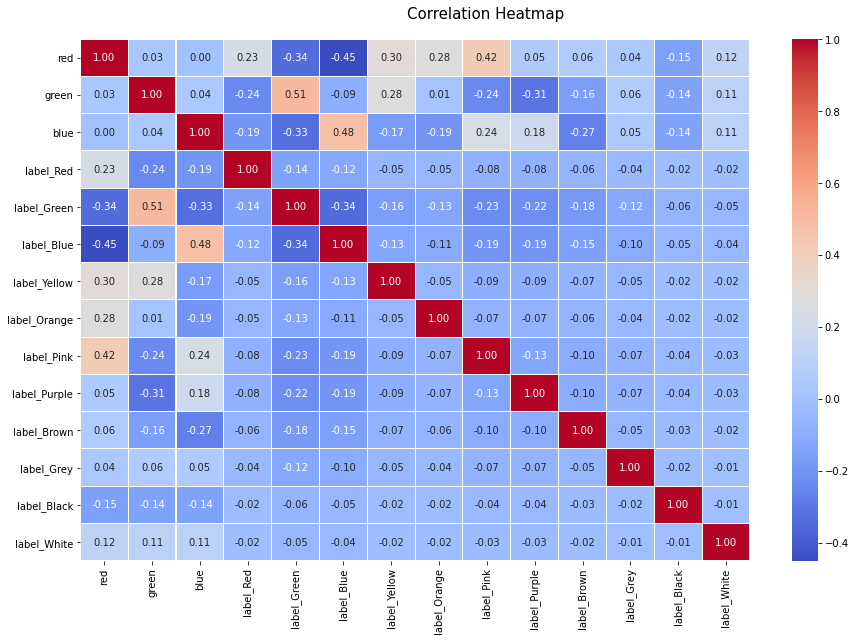

In [ ]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 9))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=15)

# Split the data into train and test

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=8) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within 
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
4185,189,148,192,0,0,0,0,0,0,1,0,0,0,0
3378,178,251,22,0,0,0,1,0,0,0,0,0,0,0
2744,54,9,125,0,0,1,0,0,0,0,0,0,0,0
968,119,147,60,0,1,0,0,0,0,0,0,0,0,0
2286,230,161,233,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,223,157,205,0,0,0,0,0,0,1,0,0,0,0
3707,203,8,10,1,0,0,0,0,0,0,0,0,0,0
881,154,153,123,0,0,0,0,0,0,0,0,1,0,0
1352,151,141,236,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
5,199,150,175,0,0,0,0,0,1,0,0,0,0,0
11,249,99,108,0,0,0,0,0,1,0,0,0,0,0
13,180,134,41,0,0,0,0,0,0,0,1,0,0,0
17,249,15,198,0,0,0,0,0,1,0,0,0,0,0
21,159,253,91,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,21,21,21,0,0,0,0,0,0,0,0,0,1,0
5043,22,22,22,0,0,0,0,0,0,0,0,0,1,0
5046,25,25,25,0,0,0,0,0,0,0,0,0,1,0
5047,26,26,26,0,0,0,0,0,0,0,0,0,1,0


## Split features: `red`, `green`, `blue` and labels

In [ ]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
train_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
4185,0,0,0,0,0,0,1,0,0,0,0
3378,0,0,0,1,0,0,0,0,0,0,0
2744,0,0,1,0,0,0,0,0,0,0,0
968,0,1,0,0,0,0,0,0,0,0,0
2286,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1883,0,0,0,0,0,0,1,0,0,0,0
3707,1,0,0,0,0,0,0,0,0,0,0
881,0,0,0,0,0,0,0,0,1,0,0
1352,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
train_dataset

,red,green,blue
4185,189,148,192
3378,178,251,22
2744,54,9,125
968,119,147,60
2286,230,161,233
...,...,...,...
1883,223,157,205
3707,203,8,10
881,154,153,123
1352,151,141,236


In [ ]:
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
5,0,0,0,0,0,1,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,0
13,0,0,0,0,0,0,0,1,0,0,0
17,0,0,0,0,0,1,0,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5042,0,0,0,0,0,0,0,0,0,1,0
5043,0,0,0,0,0,0,0,0,0,1,0
5046,0,0,0,0,0,0,0,0,0,1,0
5047,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
test_dataset

,red,green,blue
5,199,150,175
11,249,99,108
13,180,134,41
17,249,15,198
21,159,253,91
...,...,...,...
5042,21,21,21
5043,22,22,22
5046,25,25,25
5047,26,26,26


# Build & Compile the Model

## Set up the layers

In [ ]:
from keras import regularizers
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])

## Compile the model

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_4 (Dense)              (None, 11)                187       
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


Param #

first layer: 3inputs\*3neurons + 1bias at each neuron = 3\*3 + 1\*3 = 12

second layer: 3inputs*24neurons +24biases = 72+24 = 96

third layer: 24inputs*24neurons +24biases = 576+24 = 600

fourth layer: 24inputs*16neurons +16biases = 384+16 = 400

fifth layer: 16inputs*11neurons +11biases = 176+11 = 187

## Train the model

In [ ]:
history = model.fit(x=train_dataset, y=train_labels, 
                    validation_split=0.2, 
                    epochs=5001, 
                    batch_size=2048, 
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()], 
                    shuffle=True)


Epoch: 0, accuracy:0.0334,  loss:8.4276,  val_accuracy:0.0358,  val_loss:7.3572,  
....................................................................................................
Epoch: 100, accuracy:0.6270,  loss:1.0215,  val_accuracy:0.6366,  val_loss:1.0345,  
....................................................................................................
Epoch: 200, accuracy:0.7062,  loss:0.7494,  val_accuracy:0.7145,  val_loss:0.7833,  
....................................................................................................
Epoch: 300, accuracy:0.7510,  loss:0.6516,  val_accuracy:0.7429,  val_loss:0.6872,  
....................................................................................................
Epoch: 400, accuracy:0.7689,  loss:0.6024,  val_accuracy:0.7540,  val_loss:0.6418,  
....................................................................................................
Epoch: 500, accuracy:0.7847,  loss:0.5749,  val_accuracy:0.7701,  val_l

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
4996,0.275708,0.898856,0.352302,0.871446,4996
4997,0.272850,0.902877,0.356521,0.864030,4997
4998,0.274366,0.904114,0.354394,0.866502,4998
4999,0.274568,0.899783,0.355068,0.867738,4999
5000,0.276410,0.903186,0.359033,0.867738,5000


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'accuracy [Color]')

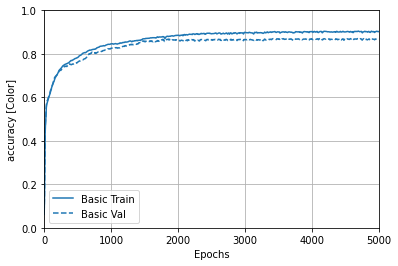

In [ ]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

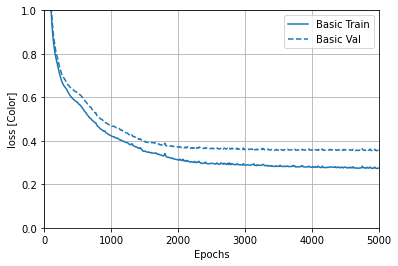

In [ ]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

# Save Model

In [ ]:
#Install PyDrive library into Google Colab notebook
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [ ]:
#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
# Save Model or weights on google drive and create on Colab directory in Google Drive

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('colormodel_acu_90.h5')
model_file = drive.CreateFile({'title' : 'colormodel_acu_90.h5'}) # colormodel_acu_  .h5 is the name of the model uploaded to Drive                   
model_file.SetContentFile('colormodel_acu_90.h5')                       
model_file.Upload()

In [ ]:
# download to google drive                       
drive.CreateFile({'id': model_file.get('id')}) ### very important to run this last cell for loading the model in new notebook

GoogleDriveFile({'id': '1c9XD2Xex-94pEjEyjrZLBR-qo5CwsYMH'})

In [ ]:
#Load model from google drive into colab
file_obj = drive.CreateFile({'id': '1c9XD2Xex-94pEjEyjrZLBR-qo5CwsYMH'})                       
file_obj.GetContentFile('colormodel_trained_90.h5') #colormodel_trained.h5 is the name of model uploaded to colab

In [ ]:
ls

adc.json              colormodel_acu_90.h5      final_data.csv
colormodel_acu_89.h5  colormodel_trained_90.h5  sample_data/


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel_trained_90.h5') #very important

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_4 (Dense)              (None, 11)                187       
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


# Make Prediction

The prediction by the ANN model is an array of 11 numbers. 

They represent the model's "confidence" that the RGB color corresponds to each of the 11 different classes of color as follows:

* 0 for Red
* 1 for Green
* 2 for Blue 
* 3 for Yellow
* 4 for Orange
* 5 for Pink
* 6 for Purple
* 7 for Brown
* 8 for Grey
* 9 for Black
* 10 for White 




You can see which out of the 11 labels has the highest confidence value 

## Train Dataset Prediction

In [ ]:
train_predictions = model.predict(train_dataset)
train_predictions

array([[   6.6414285,  -10.715376 ,    7.608483 , ...,    4.3335853,
         -27.685467 ,    2.1767297],
       [  -7.101584 ,   39.32995  ,  -17.919071 , ...,   12.647608 ,
         -81.99742  ,  -40.66754  ],
       [   2.488012 ,  -20.27663  ,   17.728304 , ...,   -6.0555873,
           1.9531192,  -13.140007 ],
       ...,
       [  -4.3495016,    9.806089 ,   -2.3537765, ...,   11.821397 ,
         -24.579756 ,  -12.1771145],
       [  -2.738946 ,  -12.031187 ,   16.35327  , ...,    5.5947495,
         -15.198125 ,   -8.385141 ],
       [   2.675357 ,   33.05732  ,  -20.956156 , ...,    2.6135037,
        -146.58624  ,  -30.97173  ]], dtype=float32)

### Selecting Class with highest confidence

In [ ]:
actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot
actual_encoded_train_labels

array([6, 3, 2, ..., 8, 6, 3])

In [ ]:
predicted_encoded_train_labels = np.argmax(train_predictions, axis=1)
predicted_encoded_train_labels

array([6, 1, 2, ..., 8, 2, 3])

### Converting numpy array to pandas dataframe

In [ ]:
actual_encoded_train_labels = pd.DataFrame(actual_encoded_train_labels, columns=['Labels'])
actual_encoded_train_labels

,Labels
0,6
1,3
2,2
3,1
4,5
...,...
4037,6
4038,0
4039,8
4040,6


In [ ]:
predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels

,Labels
0,6
1,1
2,2
3,1
4,5
...,...
4037,5
4038,0
4039,8
4040,2


### Visualize Prediction for Train Dataset

In [ ]:
#Plot Actual vs Predicted Class for Training Dataset
actual_chart = go.Scatter(x=actual_encoded_train_labels.index, y=actual_encoded_train_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_train_labels.index, y=predicted_encoded_train_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

## Test Dataset Prediction

In [ ]:
test_predictions = model.predict(test_dataset)
test_predictions

array([[   7.317348  ,   -9.120554  ,    2.1902366 , ...,    3.8448293 ,
         -42.040474  ,    0.65763795],
       [  22.485693  ,  -35.57192   ,   -6.425402  , ...,  -25.738146  ,
        -146.70685   ,   -4.212581  ],
       [   4.782423  ,   12.73015   ,  -11.47536   , ...,   -0.26712045,
        -101.62277   ,  -14.429132  ],
       ...,
       [  -6.1959515 ,    1.2509282 ,    0.9866743 , ...,    4.784351  ,
          10.857427  ,  -16.681133  ],
       [  -6.2437034 ,    1.2409992 ,    0.9721352 , ...,    4.901029  ,
          10.7092285 ,  -16.653154  ],
       [  -6.386958  ,    1.2112149 ,    0.9285153 , ...,    5.2510605 ,
          10.264628  ,  -16.569199  ]], dtype=float32)

### Selecting Class with highest confidence

In [ ]:
actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1) 
actual_encoded_test_labels

array([5, 5, 7, ..., 9, 9, 9])

In [ ]:
predicted_encoded_test_labels = np.argmax(test_predictions, axis=1)
predicted_encoded_test_labels

array([5, 0, 7, ..., 9, 9, 9])

### Converting numpy array to pandas dataframe

In [ ]:
actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Labels'])
actual_encoded_test_labels

,Labels
0,5
1,5
2,7
3,5
4,1
...,...
1005,9
1006,9
1007,9
1008,9


In [ ]:
predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Labels'])
predicted_encoded_test_labels

,Labels
0,5
1,0
2,7
3,5
4,1
...,...
1005,9
1006,9
1007,9
1008,9


### Visualize Prediction for Test Dataset

In [ ]:
#Plot Actual vs Predicted Class for Test Dataset
actual_chart = go.Scatter(x=actual_encoded_test_labels.index, y=actual_encoded_test_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_test_labels.index, y=predicted_encoded_test_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

# Evaluate Model

## Evaluating for Training Dataset

In [ ]:
model.evaluate(x=train_dataset, y=train_labels)

127/127 [==============================] - 0s 909us/step - loss: 0.2896 - accuracy: 0.8963


[0.28956136107444763, 0.8963384628295898]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(actual_encoded_train_labels, predicted_encoded_train_labels)
confusion_matrix_train

array([[ 159,    0,    0,    0,    7,   14,    0,   10,    0,    0,    0],
       [   0, 1104,   21,   17,    0,    0,    0,    5,    5,    0,    0],
       [   0,   30,  825,    0,    0,    0,   25,    0,    7,    1,    0],
       [   0,   21,    0,  191,   11,    0,    0,    2,    0,    0,    0],
       [  15,    0,    0,    7,  135,    1,    0,    9,    0,    0,    0],
       [  13,    0,    0,    0,    0,  400,   50,    7,    1,    0,    1],
       [   1,    0,   23,    0,    0,   29,  373,    7,    9,    2,    1],
       [   7,    5,    0,    3,    7,    1,    6,  278,    6,    0,    0],
       [   0,    7,    9,    0,    0,    0,    5,    4,  108,    0,    0],
       [   0,    0,    1,    0,    0,    0,    2,    0,    0,   35,    0],
       [   0,    1,    0,    0,    0,    1,    0,    0,    2,    0,   15]])

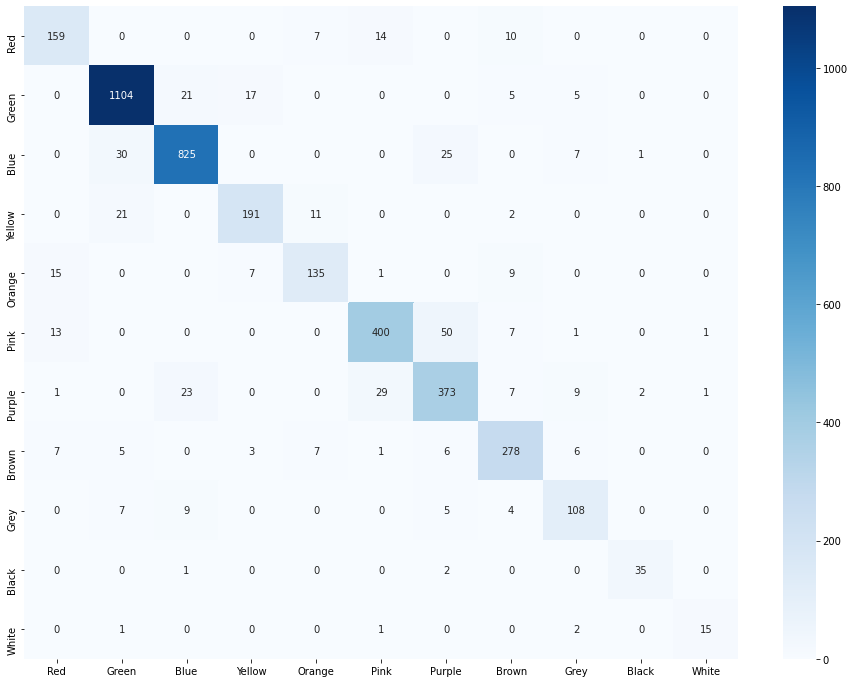

In [ ]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [ ]:
#newest model performance report
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_train_labels, predicted_encoded_train_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.82      0.84      0.83       190
       Green       0.95      0.96      0.95      1152
        Blue       0.94      0.93      0.93       888
      Yellow       0.88      0.85      0.86       225
      Orange       0.84      0.81      0.83       167
        Pink       0.90      0.85      0.87       472
      Purple       0.81      0.84      0.82       445
       Brown       0.86      0.89      0.88       313
        Grey       0.78      0.81      0.80       133
       Black       0.92      0.92      0.92        38
       White       0.88      0.79      0.83        19

    accuracy                           0.90      4042
   macro avg       0.87      0.86      0.87      4042
weighted avg       0.90      0.90      0.90      4042



## Evaluating for Test Dataset

In [ ]:
model.evaluate(x=test_dataset, y=test_labels)

32/32 [==============================] - 0s 1ms/step - loss: 0.3706 - accuracy: 0.8911


[0.3705542981624603, 0.8910890817642212]

In [ ]:
confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
confusion_matrix_test

array([[ 42,   0,   0,   0,   0,   2,   0,   2,   0,   0,   0],
       [  0, 290,   7,   2,   0,   1,   0,   1,   3,   1,   0],
       [  0,   4, 206,   0,   0,   0,   8,   0,   1,   0,   0],
       [  0,   6,   0,  51,   2,   0,   0,   1,   0,   0,   0],
       [  3,   0,   0,   2,  27,   0,   0,   6,   0,   0,   0],
       [  6,   0,   0,   0,   0,  93,   4,   3,   1,   0,   0],
       [  0,   0,   8,   0,   0,  10,  86,   2,   1,   1,   0],
       [  3,   1,   0,   2,   2,   0,   0,  53,   2,   0,   0],
       [  0,   1,   2,   1,   0,   0,   2,   4,  31,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  13,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   8]])

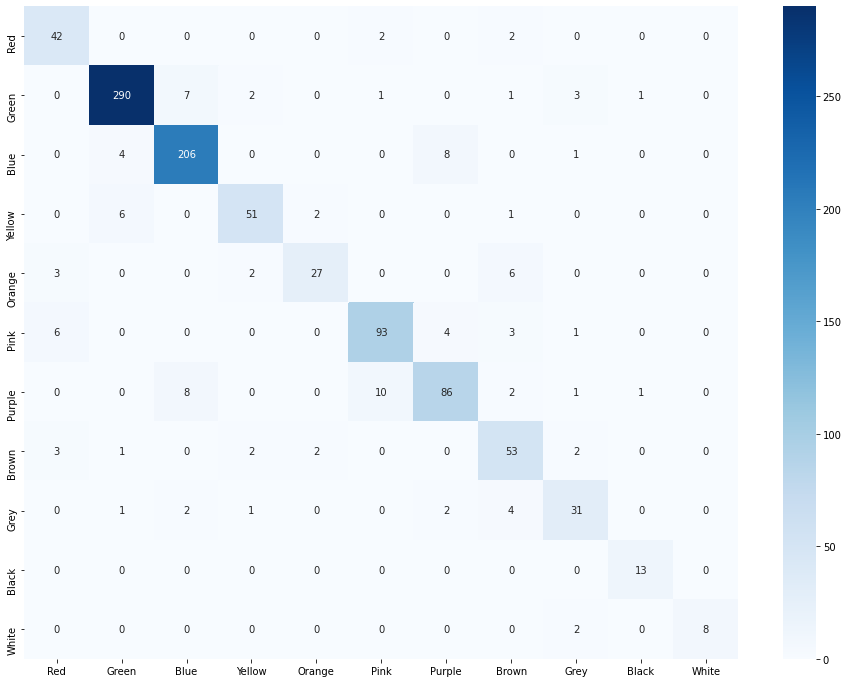

In [ ]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [ ]:
#newest
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_test_labels, predicted_encoded_test_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.78      0.91      0.84        46
       Green       0.96      0.95      0.96       305
        Blue       0.92      0.94      0.93       219
      Yellow       0.88      0.85      0.86        60
      Orange       0.87      0.71      0.78        38
        Pink       0.88      0.87      0.87       107
      Purple       0.86      0.80      0.83       108
       Brown       0.74      0.84      0.79        63
        Grey       0.76      0.76      0.76        41
       Black       0.87      1.00      0.93        13
       White       1.00      0.80      0.89        10

    accuracy                           0.89      1010
   macro avg       0.86      0.86      0.86      1010
weighted avg       0.89      0.89      0.89      1010



# Visualizing Model Architecture

In [ ]:
#Libraries to visualize model
!pip install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=99c109c17bac0b04959e615d895bb695b89aebe750a07e6e2dc20914d62f07fa
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz;
model.load_weights("colormodel_trained_90.h5")
ann_viz(model, title="Artificial Neural network - RGB Color Classifier Model Visualization")
#The result is a file (.pdf) that will be saved in the project directory